## Train NER with Spacy v3 📣

##### Author : Deepak John Reji


Youtube: https://youtu.be/9mXoGxAn6pM

Linkedin: https://www.linkedin.com/in/deepak-john-reji/

This Notebook details on te steps to train your Custom NER using new spacy format 
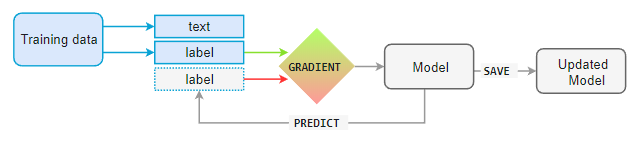

### Step-1 : Creation of Training Data

#### Annotate your data

https://prodi.gy/docs/named-entity-recognition

In [1]:
TRAIN_DATA = [('The F15 aircraft uses a lot of fuel', {'entities': [(4, 7, 'aircraft')]}),
 ('did you see the F16 landing?', {'entities': [(16, 19, 'aircraft')]}),
 ('how many missiles can a F35 carry', {'entities': [(24, 27, 'aircraft')]}),
 ('is the F15 outdated', {'entities': [(7, 10, 'aircraft')]}),
 ('does the US still train pilots to dog fight?',
  {'entities': [(0, 0, 'aircraft')]}),
 ('how long does it take to train a F16 pilot',
  {'entities': [(33, 36, 'aircraft')]}),
 ('how much does a F35 cost', {'entities': [(16, 19, 'aircraft')]}),
 ('would it be possible to steal a F15', {'entities': [(32, 35, 'aircraft')]}),
 ('who manufactures the F16', {'entities': [(21, 24, 'aircraft')]}),
 ('how many countries have bought the F35',
  {'entities': [(35, 38, 'aircraft')]}),
 ('is the F35 a waste of money', {'entities': [(7, 10, 'aircraft')]})]

### Step-2 : Conversion of Data to .spacy format

Copy the training data and below script and run from command line 

In [2]:
import pandas as pd
import os
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin

#nlp = spacy.blank("en") # load a new spacy model
nlp = spacy.load("en_core_web_sm") # load other spacy model

db = DocBin() # create a DocBin object

for text, annot in tqdm(TRAIN_DATA): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

os.chdir(r'XXXX\XXXXX')
db.to_disk("./train.spacy") # save the docbin object

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1002.79it/s]

Skipping entity


### Step-3 : Creating the Config file for training the model

https://spacy.io/usage/training#config

- Head on to Quickstart section of the page and select your configuration. (Make sure you mark NER, you can select the language based on your requirement)

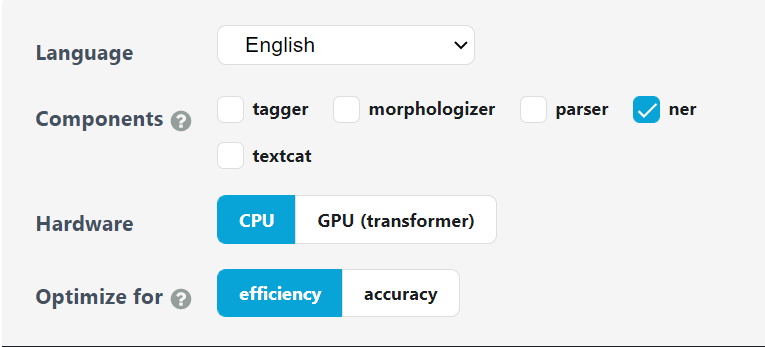

- Once the configurations are set, you can download it.

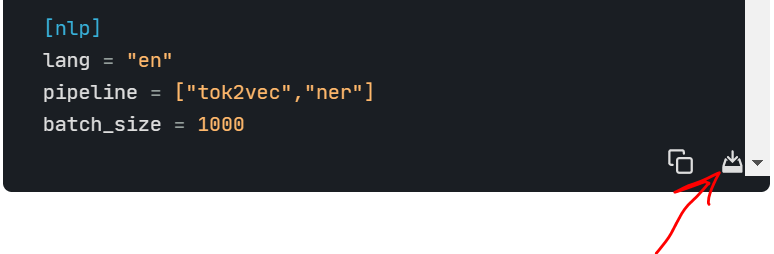

### Step-4 : Filling the Config file 

Go to the directory where base_config.cfg is stored and then run this command

python -m spacy init fill-config base_config.cfg config.cfg

### Step-5 : Run the Training configuration

In [ ]:
python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy 

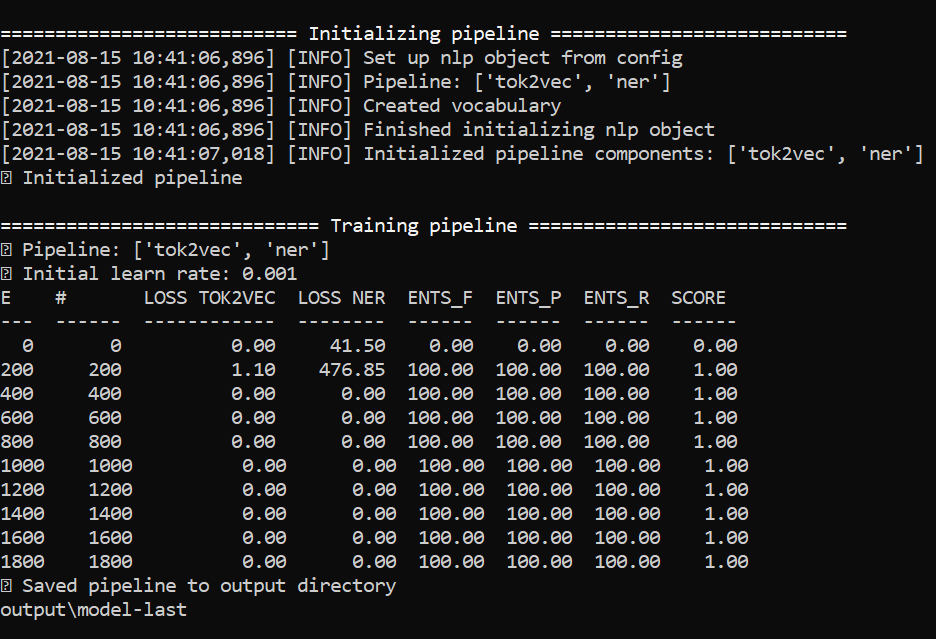

In [4]:
nlp1 = spacy.load(r".\output\model-best") #load the best model
doc = nlp1("there was a flight named D16") # input sample text

spacy.displacy.render(doc, style="ent", jupyter=True) # display in Jupyter